Obtener total de exportaciones

In [514]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


synergy_logistics_database = pd.read_csv("synergy_logistics_database.csv", parse_dates=['date'])
pd.DataFrame(synergy_logistics_database)

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,2015-01-02,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,2015-03-02,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,2015-04-02,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...,...
19051,19052,Imports,Japan,Singapore,2020,2020-06-27,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,2020-06-28,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,2020-06-29,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,2020-06-30,Gas turbines,Sea,Union Energy Co,13000000


Monto total de importaciones y exportaciones

In [69]:
tt = pd.DataFrame(synergy_logistics_database['total_value'])
tt.sum()

total_value    215691298000
dtype: int64

In [ ]:
Monto total por tipo de dirección

In [84]:
t = pd.DataFrame(synergy_logistics_database.groupby(['direction'])['total_value'].sum())
t

,total_value
direction,
Exports,160163298000
Imports,55528000000


Exportacianes e importaciones por origen

In [663]:
ot = pd.DataFrame(synergy_logistics_database.groupby(['direction','origin'])['total_value'].sum())
ordering_ot = ot.sort_values(by=['direction','total_value'], ascending=False)
ordering_ot['acumulate_sum']  = ordering_ot.groupby(level=[0])['total_value'].cumsum()
ordering_ot['total_percentage'] = 0
ordering_ot['acumulate_percentage'] = 0

for i_row, row in ordering_ot.iterrows():
    index = ordering_ot.index.get_loc(i_row)
    direction = ordering_ot.index[index][0]
    total_value = ordering_ot['total_value'][index]
    acumulate = ordering_ot['acumulate_sum'][index]
    ordering_ot['total_percentage'][index] = 100*total_value/t.loc[direction]
    ordering_ot['acumulate_percentage'][index] = 100*acumulate/t.loc[direction]
    
    

In [665]:
ordering_ot[ordering_ot['acumulate_percentage']<=80]

total_value  acumulate_sum  total_percentage  \
direction origin                                                      
Imports   China        12233000000    12233000000                22   
          Japan         8094000000    20327000000                14   
          USA           5291000000    25618000000                 9   
          Mexico        4621000000    30239000000                 8   
          Germany       4250000000    34489000000                 7   
          Singapore     4017000000    38506000000                 7   
          South Korea   3889000000    42395000000                 7   
Exports   China        32977046000    32977046000                20   
          France       18614332000    51591378000                11   
          USA          18355306000    69946684000                11   
          South Korea  14621146000    84567830000                 9   
          Russia       13223000000    97790830000                 8   
          Japan        11948976000   109739806000                 7   
          Germany      11343233000   121083039000                 7   

                       acumulate_percentage  
direction origin                             
Imports   China                          22  
          Japan                          36  
          USA                            46  
          Mexico                         54  
          Germany                        62  
          Singapore                      69  
          South Korea                    76  
Exports   China                          20  
          France                         32  
          USA                            43  
          South Korea                    52  
          Russia                         61  
          Japan                          68  
          Germany                        75

([<matplotlib.patches.Wedge at 0x2258cb97310>,
 [Text(0.6781550659214208, 0.8660864313479998, 'China'),
  Text(-0.8205699820549477, 0.7325741631741752, 'Japan'),
  Text(-1.0621571580642224, -0.28604575083880357, 'USA'),
  Text(-0.5965770083437482, -0.924173075303335, 'Mexico'),
  Text(0.09244901675061278, -1.0961081968956554, 'Germany'),
  Text(0.705903528030314, -0.8436232625493183, 'Singapore'),
  Text(1.0546370327282408, -0.3126351374976456, 'South Korea')],
 [Text(0.36990276322986587, 0.47241078073527254, '29%'),
  Text(-0.44758362657542594, 0.3995859071859137, '19%'),
  Text(-0.5793584498532122, -0.15602495500298375, '12%'),
  Text(-0.3254056409147717, -0.5040944047109099, '11%'),
  Text(0.050426736409425146, -0.5978771983067211, '10%'),
  Text(0.38503828801653484, -0.460158143208719, '9%'),
  Text(0.575256563306313, -0.17052825681689757, '9%')])

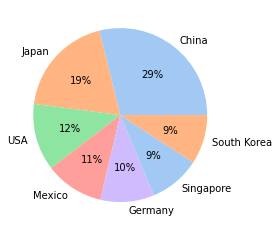

([<matplotlib.patches.Wedge at 0x2258cbfc040>,
 [Text(0.7213299505007864, 0.8304716145122201, 'China'),
  Text(-0.6421756198336472, 0.8930904060011344, 'France'),
  Text(-1.0999233451633168, -0.012985944892054666, 'USA'),
  Text(-0.7114885315899449, -0.8389183925841561, 'South Korea'),
  Text(0.020949899339417766, -1.0998004826865955, 'Russia'),
  Text(0.6849391412802549, -0.8607313011284456, 'Japan'),
  Text(1.0527030091894178, -0.31908678199440477, 'Germany')],
 [Text(0.39345270027315615, 0.4529845170066654, '27%'),
  Text(-0.350277610818353, 0.48714022145516417, '15%'),
  Text(-0.5999581882709, -0.0070832426683934534, '15%'),
  Text(-0.3880846535945153, -0.45759185050044876, '12%'),
  Text(0.011427217821500598, -0.5998911723745066, '11%'),
  Text(0.3736031679710481, -0.46948980061551576, '10%'),
  Text(0.574201641376046, -0.17404733563331168, '9%')])

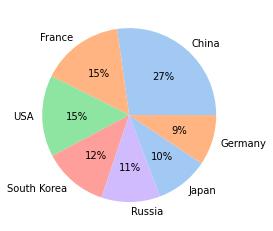

In [673]:
data1 = ordering_ot[ordering_ot['acumulate_percentage']<=80]
r_data = data1.reset_index()

data_import = r_data[ r_data['direction']=="Imports"]
data = data_import['total_value']
labels = data_import['origin']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

data_export = r_data[ r_data['direction']=="Exports"]
data = data_export['total_value']
labels = data_export['origin']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Exportacianes e importaciones por destino

In [483]:
dt = pd.DataFrame(synergy_logistics_database.groupby(['direction','destination'])['total_value'].sum())
ordering_dt = dt.sort_values(by=['direction','total_value'], ascending=False)
ordering_dt['acumulate_sum']  = ordering_dt.groupby(level=[0])['total_value'].cumsum()
ordering_dt['total_percentage'] = 0

for i_row, row in ordering_dt.iterrows():
    index = ordering_dt.index.get_loc(i_row)
    direction = ordering_dt.index[index][0]
    acumulate = ordering_dt['acumulate_sum'][index]
    ordering_dt['total_percentage'][index] = 100*acumulate/t.loc[direction]
    

Tabla

In [576]:
ordering_dt[ordering_dt['total_percentage']<=80]

total_value  acumulate_sum  total_percentage
direction destination                                                       
Imports   Thailand              13745000000    13745000000                24
          Mexico                 8894000000    22639000000                40
          United Arab Emirates   7848000000    30487000000                54
          Japan                  5828000000    36315000000                65
          Germany                5109000000    41424000000                74
Exports   Mexico                28315015000    28315015000                17
          USA                   13159409000    41474424000                25
          Belgium               13099380000    54573804000                34
          Germany               11303451000    65877255000                41
          China                 11259992000    77137247000                48
          Japan                  8777152000    85914399000                53
          United Kingdom         8150673000    94065072000                58
          Brazil                 7508016000   101573088000                63
          South Korea            7321668000   108894756000                67
          Vietnam                6877007000   115771763000                72
          Italy                  6109329000   121881092000                76
          Spain                  5934191000   127815283000                79

total_value  acumulate_sum  total_percentage
direction destination                                                       
Imports   Thailand              13745000000    13745000000                24
          Mexico                 8894000000    22639000000                40
          United Arab Emirates   7848000000    30487000000                54
          Japan                  5828000000    36315000000                65
          Germany                5109000000    41424000000                74
Exports   Mexico                28315015000    28315015000                17
          USA                   13159409000    41474424000                25
          Belgium               13099380000    54573804000                34
          Germany               11303451000    65877255000                41
          China                 11259992000    77137247000                48
          Japan                  8777152000    85914399000                53
          United Kingdom         8150673000    94065072000                58
          Brazil                 7508016000   101573088000                63
          South Korea            7321668000   108894756000                67
          Vietnam                6877007000   115771763000                72
          Italy                  6109329000   121881092000                76
          Spain                  5934191000   127815283000                79

([<matplotlib.patches.Wedge at 0x2258c486730>,
 [Text(0.5545452939434601, 0.949989219394179, 'Thailand'),
  Text(-1.020617359068175, 0.4102928300235137, 'Mexico'),
  Text(-0.6945063278375868, -0.8530304570140216, 'United Arab Emirates'),
  Text(0.3811824133406623, -1.0318429956925563, 'Japan'),
  Text(1.0184562500483825, -0.41562827952075987, 'Germany')],
 [Text(0.3024792512418873, 0.5181759378513703, '33%'),
  Text(-0.55670037767355, 0.22379608910373472, '21%'),
  Text(-0.37882163336595637, -0.46528934018946627, '19%'),
  Text(0.20791768000399757, -0.5628234521959398, '14%'),
  Text(0.5555215909354813, -0.22670633428405082, '12%')])

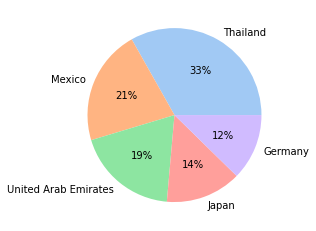

([<matplotlib.patches.Wedge at 0x2258c4e3130>,
 [Text(0.8441828744087768, 0.7052341983730904, 'Mexico'),
  Text(-0.15847327792012603, 1.0885247907995714, 'USA'),
  Text(-0.7813798741246274, 0.7742386533317629, 'Belgium'),
  Text(-1.0820293146781021, 0.19802162047927147, 'Germany'),
  Text(-1.0241278132993137, -0.40145014886878105, 'China'),
  Text(-0.7125992038979762, -0.8379751634768007, 'Japan'),
  Text(-0.3131179789761704, -1.0544937796127005, 'United Kingdom'),
  Text(0.10569338551030934, -1.0949104567312202, 'Brazil'),
  Text(0.48906685316129506, -0.9852987430921185, 'South Korea'),
  Text(0.7965081710122272, -0.7586664178087474, 'Vietnam'),
  Text(0.9943456928670762, -0.47040051347409734, 'Italy'),
  Text(1.088319845491574, -0.15987468188927587, 'Spain')],
 [Text(0.46046338604115095, 0.38467319911259473, '22%'),
  Text(-0.0864399697746142, 0.5937407949815844, '10%'),
  Text(-0.4262072040679785, 0.42231199272641606, '10%'),
  Text(-0.5901978080062374, 0.10801179298869351, '9%'),
 

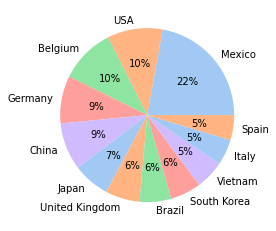

In [575]:
data1 = ordering_dt[ordering_dt['total_percentage']<=80]
r_data = data1.reset_index()

data_import = r_data[ r_data['direction']=="Imports"]
data = data_import['total_value']
labels = data_import['destination']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

data_export = r_data[ r_data['direction']=="Exports"]
data = data_export['total_value']
labels = data_export['destination']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Grupos de importacion y exportacion


In [655]:
odt = pd.DataFrame(synergy_logistics_database.groupby(['direction','origin','destination'])['total_value'].sum())
ordering_odt = odt.sort_values(by=['direction','total_value'], ascending=False)
ordering_odt['acumulate_sum']  = ordering_odt.groupby(level=[0])['total_value'].cumsum()
ordering_odt['total_percentage'] = 0

num_import = 0
num_export = 0
maximo = 10

for i_row, row in ordering_odt.iterrows():
    index = ordering_odt.index.get_loc(i_row)
    direction = ordering_odt.index[index][0]
    acumulate = ordering_odt['acumulate_sum'][index]
    ordering_odt['total_percentage'][index] = 100*acumulate/t.loc[direction]

In [650]:
Top 10 Import

In [656]:
ordering_odt[:10]

total_value  acumulate_sum  \
direction origin    destination                                        
Imports   Singapore Thailand               4017000000     4017000000   
          Japan     Mexico                 3918000000     7935000000   
          China     Thailand               3831000000    11766000000   
          Malaysia  Thailand               3482000000    15248000000   
          China     United Arab Emirates   3357000000    18605000000   
                    Japan                  3237000000    21842000000   
          Mexico    USA                    2365000000    24207000000   
          Japan     United Arab Emirates   2238000000    26445000000   
          Spain     Germany                2044000000    28489000000   
          Germany   Mexico                 1804000000    30293000000   

                                          total_percentage  
direction origin    destination                             
Imports   Singapore Thailand                             7  
          Japan     Mexico                              14  
          China     Thailand                            21  
          Malaysia  Thailand                            27  
          China     United Arab Emirates                33  
                    Japan                               39  
          Mexico    USA                                 43  
          Japan     United Arab Emirates                47  
          Spain     Germany                             51  
          Germany   Mexico                              54

Top 10 Export

In [657]:
ordering_odt = ordering_odt.sort_values(by=['direction'], ascending=True).sort_values(by=['total_value'], ascending=False)
ordering_odt[:10]

total_value  acumulate_sum  \
direction origin      destination                                  
Exports   China       Mexico          12250000000    12250000000   
          Canada      Mexico           8450000000    20700000000   
          South Korea Vietnam          6877007000    27577007000   
          France      Belgium          5538069000    33115076000   
                      United Kingdom   5427000000    38542076000   
          China       South Korea      4790000000    43332076000   
          USA         Mexico           4710000000    48042076000   
          South Korea Japan            4594000000    52636076000   
          Germany     Italy            4541000000    57177076000   
          China       Germany          4090000000    61267076000   

                                      total_percentage  
direction origin      destination                       
Exports   China       Mexico                         7  
          Canada      Mexico                        12  
          South Korea Vietnam                       17  
          France      Belgium                       20  
                      United Kingdom                24  
          China       South Korea                   27  
          USA         Mexico                        29  
          South Korea Japan                         32  
          Germany     Italy                         35  
          China       Germany                       38

([<matplotlib.patches.Wedge at 0x2258c6312b0>,
 [Text(1.0555941172376346, 0.3093882021882848, 'Thailand'),
  Text(0.727385082114431, 0.8251732801765836, 'Mexico'),
  Text(0.18881707624975597, 1.0836734340734269, 'Thailand'),
  Text(-0.37360830721085403, 1.0346095073906099, 'Thailand'),
  Text(-0.813163408128349, 0.7407869273151951, 'United Arab Emirates'),
  Text(-1.0599002787168845, 0.2942981467421614, 'Japan'),
  Text(-1.0911740557013103, -0.1390653808981726, 'USA'),
  Text(-0.9888289967570257, -0.4818892146256172, 'United Arab Emirates'),
  Text(-0.7993020310705484, -0.7557223452608082, 'Germany'),
  Text(-0.5658343447058589, -0.943308801162849, 'Mexico'),
  Text(-0.3152648777196612, -1.0538539067994233, 'United Arab Emirates'),
  Text(-0.05950191343763054, -1.0983895130131482, 'Germany'),
  Text(0.18843227415933536, -1.0837404108250006, 'Thailand'),
  Text(0.4056582671112921, -1.0224682735049846, 'China'),
  Text(0.5876389525729704, -0.9298819610138388, 'Mexico'),
  Text(0.74587981

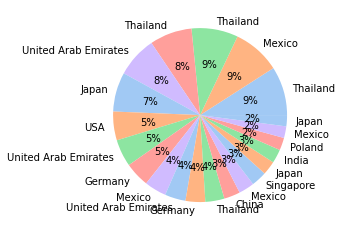

([<matplotlib.patches.Wedge at 0x2258c6e42e0>,
 [Text(1.0518806154331166, 0.32178746227292326, 'Mexico'),
  Text(0.7675324446187702, 0.7879682394979728, 'Mexico'),
  Text(0.42918567064210156, 1.0128176835519263, 'Vietnam'),
  Text(0.10974953526873991, 1.0945113245226363, 'Belgium'),
  Text(-0.1815424900516001, 1.0849158143864734, 'United Kingdom'),
  Text(-0.44190144624775646, 1.007334657303193, 'South Korea'),
  Text(-0.660116808962712, 0.8799123811635375, 'Mexico'),
  Text(-0.8401330622946453, 0.7100538272831305, 'Japan'),
  Text(-0.975543085826644, 0.508247663738683, 'Italy'),
  Text(-1.0598164503885739, 0.2945998837164803, 'Germany'),
  Text(-1.096482917746424, 0.08789317999872928, 'USA'),
  Text(-1.0947697421928608, -0.10714108259195926, 'Belorussia'),
  Text(-1.0614498511581563, -0.28865933810692507, 'USA'),
  Text(-1.0000457685984752, -0.4581576810534615, 'Brazil'),
  Text(-0.914217223083966, -0.6117245041819416, 'Belgium'),
  Text(-0.8087943382784982, -0.745554638084055, 'Argen

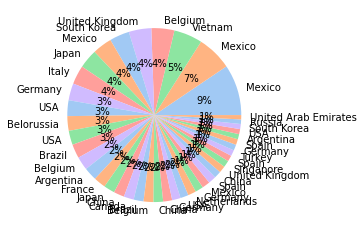

Sumatoria por transporte


In [595]:
trans_t = pd.DataFrame(synergy_logistics_database.groupby(['direction','transport_mode'])['total_value'].sum())
ordering_trans_t = trans_t.sort_values(by=['direction','total_value'], ascending=False)
ordering_trans_t['acumulate_sum']  = ordering_trans_t.groupby(level=[0])['total_value'].cumsum()
ordering_trans_t['total_percentage'] = 0

for i_row, row in ordering_odt.iterrows():
    index = ordering_trans_t.index.get_loc(i_row)
    direction = ordering_trans_t.index[index][0]
    acumulate = ordering_trans_t['acumulate_sum'][index]
    ordering_trans_t['total_percentage'][index] = 100*acumulate/t.loc[direction]

ordering_trans_t

total_value  acumulate_sum  total_percentage
direction transport_mode                                              
Imports   Sea             34938000000    34938000000                62
          Rail             9123000000    44061000000                79
          Road             5990000000    50051000000                90
          Air              5477000000    55528000000               100
Exports   Sea             65592622000    65592622000                40
          Rail            34505043000   100097665000                62
          Air             32785147000   132882812000                82
          Road            27280486000   160163298000               100

Text(0.5, 1.0, 'Imports')

([<matplotlib.patches.Wedge at 0x2258aa759a0>,
 [Text(-0.4343117178246706, 1.0106301656690166, 'Sea'),
  Text(-0.2645529257467532, -1.0677133273865382, 'Rail'),
  Text(0.6321006935696368, -0.9002492505905153, 'Road'),
  Text(1.047610409870407, -0.3354287243680213, 'Air')],
 [Text(-0.23689730063163847, 0.5512528176376453, '63%'),
  Text(-0.1443015958618654, -0.5823890876653844, '16%'),
  Text(0.3447821964925291, -0.49104504577664465, '11%'),
  Text(0.5714238599293129, -0.18296112238255705, '10%')])

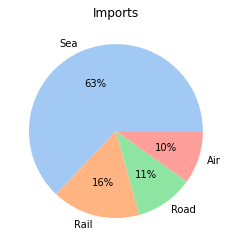

Text(0.5, 1.0, 'Exports')

([<matplotlib.patches.Wedge at 0x2258becb460>,
 [Text(0.30842997418043533, 1.055874495869209, 'Sea'),
  Text(-1.0935421383497848, -0.11901929109762097, 'Rail'),
  Text(-0.15621134071585868, -1.0888516965279313, 'Air'),
  Text(0.9462366764858591, -0.5609243728641107, 'Road')],
 [Text(0.16823453137114652, 0.5759315432013866, '41%'),
  Text(-0.5964775300089734, -0.06491961332597507, '22%'),
  Text(-0.08520618584501383, -0.5939191071970533, '20%'),
  Text(0.516129096265014, -0.30595874883496943, '17%')])

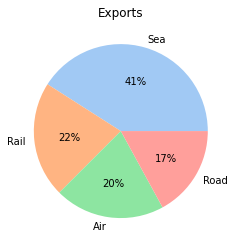

In [660]:
data1 = ordering_trans_t
r_data = data1.reset_index()

data_import = r_data[ r_data['direction']=="Imports"]
data = data_import['total_value']
labels = data_import['transport_mode']

plt.title('Imports')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

data_export = r_data[ r_data['direction']=="Exports"]
data = data_export['total_value']
labels = data_export['transport_mode']

plt.title('Exports')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()